Descriptive Statistics for log-return
            logreturn
count     2254.000000
mean         0.001626
std          0.038882
min         -0.464730
50%          0.001950
max          0.225119
skewness    -0.948304
kurtosis    13.515556
Quantiles of the log-returns distribution
0.00   -0.464730
0.01   -0.111564
0.05   -0.061683
0.10   -0.036737
0.25   -0.011848
0.50    0.001950
0.75    0.017050
0.90    0.040746
0.95    0.059071
0.99    0.109583
1.00    0.225119
Name: logreturn, dtype: float64
Top 10 logreturn:
      logreturn       Date
55     0.141444 2014-11-11
1093   0.142330 2017-09-14
1033   0.143862 2017-07-16
1863   0.144761 2019-10-24
1657   0.160042 2019-04-01
119    0.164002 2015-01-14
2009   0.167104 2020-03-18
1175   0.181724 2017-12-05
1036   0.214596 2017-07-19
1176   0.225119 2017-12-06
Last 10 logreturn
      logreturn       Date
2002  -0.464730 2020-03-11
118   -0.237558 2015-01-13
1092  -0.207530 2017-09-13
334   -0.200634 2015-08-17
1216  -0.184582 2018-01-15
1236  -0

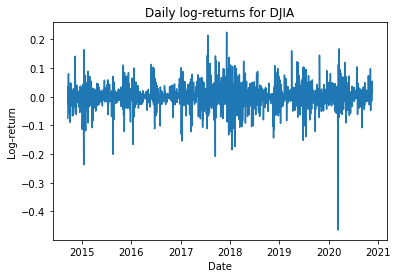

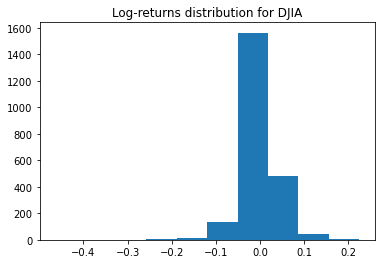

<Figure size 432x288 with 0 Axes>

Kormogorov-Smirnov test. H0: Log-returns follow a Normal distribution
KstestResult(statistic=0.11684599808094068, pvalue=2.8721310524713265e-27)


c,Pr(r<c)_empiric,Pr(r<c)_Normal
float64,float64,float64
-0.03,0.12787272358223395,0.20799878875504652
-0.06,0.05200759492207422,0.056489079955724816
-0.12,0.008085678329350176,0.0008797774819748081


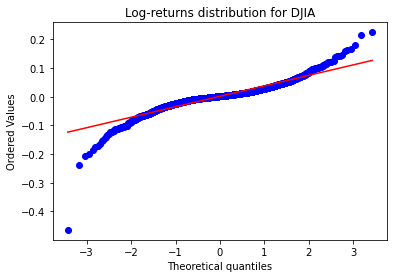

In [4]:
# This program tests the hypothesis that the DJIA log-returns are drawn from
# a Normal distribution and estimates the probability of extreme negative returns
#Author: Dragos Cioata
#Submitted: 04 Mar 2019

#import
import numpy.random as random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import pylab
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from astropy.table import Table


#read csv data
data=pd.read_csv('BTC-USD.csv', encoding='cp1252')
#make de column Date a datetime type
data['Date'] = pd.to_datetime(data['Date'])
#extract the year of the date
data['year']= data['Date'].dt.year
#keep only the 1987 year or bellow
#data=data[data['year']<=1987]

#make a empty list
logreturn=np.empty([int(len(data.index)),1])
#calculate the Log-price=log(price)
data['logprice']=np.log(data['Close'])
#calculate the log-return
for i in range(0,len(data.index)-1):
    #the formula is  logprice(t)=logprice(t-1)-logprice(t) where t is the time(year)
 logreturn[i]=np.array(data['logprice'][i+1:i+2])-np.array(data['logprice'][i:i+1])

data['logreturn']=logreturn

#drop the first element, because he dosent have a log return
data.drop(data.tail(1).index,inplace=True)

#plot log-returns
plt.figure(1)
plt.title('Daily log-returns for DJIA')
plt.plot(data['Date'],data['logreturn'])
plt.xlabel('Date')
plt.ylabel('Log-return')

#make log-return a dataframe
logreturn=pd.DataFrame(data['logreturn'])

#print  a descriptive statistics for log-return
print("Descriptive Statistics for log-return")
print(pd.concat([logreturn.describe(percentiles=[]),pd.DataFrame(logreturn.skew(), columns=["skewness"]).T,
                 pd.DataFrame(logreturn.kurtosis(), columns=["kurtosis"]).T]))

#print the quantiles for log-return
print("Quantiles of the log-returns distribution")
print(data['logreturn'].quantile([.0,.01,.05,.1,.25,0.5,.75,.9,.95,.99,1]))

#print the biggest 10 log-return
datalarger=data.nlargest(10, 'logreturn')
datalarger=datalarger[['logreturn','Date']]
print("Top 10 logreturn:")
print(datalarger.sort_values(by='logreturn'))

#print the littlest 10 log-return
datasmaller=data.nsmallest(10, 'logreturn')
datasmaller=datasmaller[['logreturn','Date']]
print("Last 10 logreturn")
print(datasmaller.sort_values(by='logreturn'))

plt.figure(2)
plt.title("Log-returns distribution for DJIA")
plt.hist(x=data['logreturn'])


plt.figure(3)
plt.show()


res = stats.probplot(data['logreturn'], plot=plt)
plt.title("Log-returns distribution for DJIA")
print("Kormogorov-Smirnov test. H0: Log-returns follow a Normal distribution")
print(scipy.stats.kstest(data['logreturn'],'norm',args=(data['logreturn'].mean(), data['logreturn'].std())))


i1=np.empty([int(len(data.index)),1])
i2=np.empty([int(len(data.index)),1])
i3=np.empty([int(len(data.index)),1])
for i in range(0,len(data.index)-1):
    if np.array(data['logreturn'][i:i+1])<-0.03:
        i1[i]=1
    else:
        i1[i]=0
    if np.array(data['logreturn'][i:i+1])<-0.06:
        i2[i]=1
    else:
        i2[i]=0
    if np.array(data['logreturn'][i:i + 1]) < -0.12:
        i3[i] = 1
    else:
        i3[i] = 0
data['i1']=i1
data['i2']=i2
data['i3']=i3
mu=data['logreturn'].mean()
sigma=data['logreturn'].std()
p1=data['i1'].mean()
p2=data['i2'].mean()
p3=data['i3'].mean()
p11=np.array(norm(mu,sigma).cdf(-0.03))
p22=np.array(norm(mu,sigma).cdf(-0.06))
p33=np.array(norm(mu,sigma).cdf(-0.12))
 
#Probability of extreme negative returns;
a = [-0.03, -0.06, -0.12]
b = [p1, p2, p3]
c = [p11, p22, p33]
t = Table([a, b, c], names=('c', 'Pr(r<c)_empiric', 'Pr(r<c)_Normal'))
t
